In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [8]:
def market_evolution(current_market):
    rnd = stats.uniform.rvs()
    
    if current_market == 'bull':
        if rnd > 0.1:
            return 'bull'
        elif rnd < 0.025:
            return 'stagnant'
        else:
            return 'bear'
    elif current_market == 'bear':
        if rnd > 0.2:
            return 'bear'
        elif rnd < 0.05:
            return 'stagnant'
        else:
            return 'bull'
    elif current_market == 'stagnant':
        if rnd > 0.5:
            return 'stagnant'
        elif rnd < 0.25:
            return 'bull'
        else:
            return 'bear'

In [9]:
# Just a test to see if the function works properly

run_test = False

if run_test:
    fig, ax = plt.subplots(1, 3, figsize=(20,12))

    #----------------------------------------------------------------

    current_market = 'bull'

    bull_counter = 0
    bear_counter = 0
    stagnant_counter = 0

    for i in range(1000):
        next_market = market_evolution(current_market)
        if next_market == 'bull':
            bull_counter += 1
        elif next_market == 'bear':
            bear_counter += 1
        else:
            stagnant_counter += 1

    ax[0].set_title("Next market if current is " + current_market.upper())
    ax[0].bar(['bull', 'bear', 'stagnant'], [bull_counter, bear_counter, stagnant_counter])

    #----------------------------------------------------------------

    current_market = 'bear'

    bull_counter = 0
    bear_counter = 0
    stagnant_counter = 0

    for i in range(1000):
        next_market = market_evolution(current_market)
        if next_market == 'bull':
            bull_counter += 1
        elif next_market == 'bear':
            bear_counter += 1
        else:
            stagnant_counter += 1

    ax[1].set_title("Next market if current is " + current_market.upper())
    ax[1].bar(['bull', 'bear', 'stagnant'], [bull_counter, bear_counter, stagnant_counter])

    #----------------------------------------------------------------

    current_market = 'stagnant'

    bull_counter = 0
    bear_counter = 0
    stagnant_counter = 0

    for i in range(1000):
        next_market = market_evolution(current_market)
        if next_market == 'bull':
            bull_counter += 1
        elif next_market == 'bear':
            bear_counter += 1
        else:
            stagnant_counter += 1

    ax[2].set_title("Next market if current is " + current_market.upper())
    ax[2].bar(['bull', 'bear', 'stagnant'], [bull_counter, bear_counter, stagnant_counter])

plt.show()

In [10]:
N = 10000

# Initialise the array of markets
# Contains the market for every day
# market[0] is the starting day 
market = ['bull']

# List of possible weathers and their indexes and colors
market_list = ['bull', 'bear', 'stagnant']
market_colors = ['royalblue', 'orange', 'chartreuse']
market_indexes = [0, 1, 2]

# Total number of markets
# days_counter[j], j = 0, 1, 2
#                                           0: bull
#                                           1: bear
#                                           2: stagnant
market_counter = np.zeros(3)

# cumulative_markets[j][number_of_days]
cumulative_markets = np.zeros((3, N))

# For every day
for day in range(N):
    # Append the forcast based on the previous (current) day
    market.append(market_evolution(market[day]))

    for j in market_indexes:
        # Update the days counter considering the appended forecast
        if market[day+1] == market_list[j]:
            market_counter[j] += 1

        # Update the comulative fraction of sunny and cloudy days up to the current day
        cumulative_markets[j][day] = market_counter[j] / (day + 1)

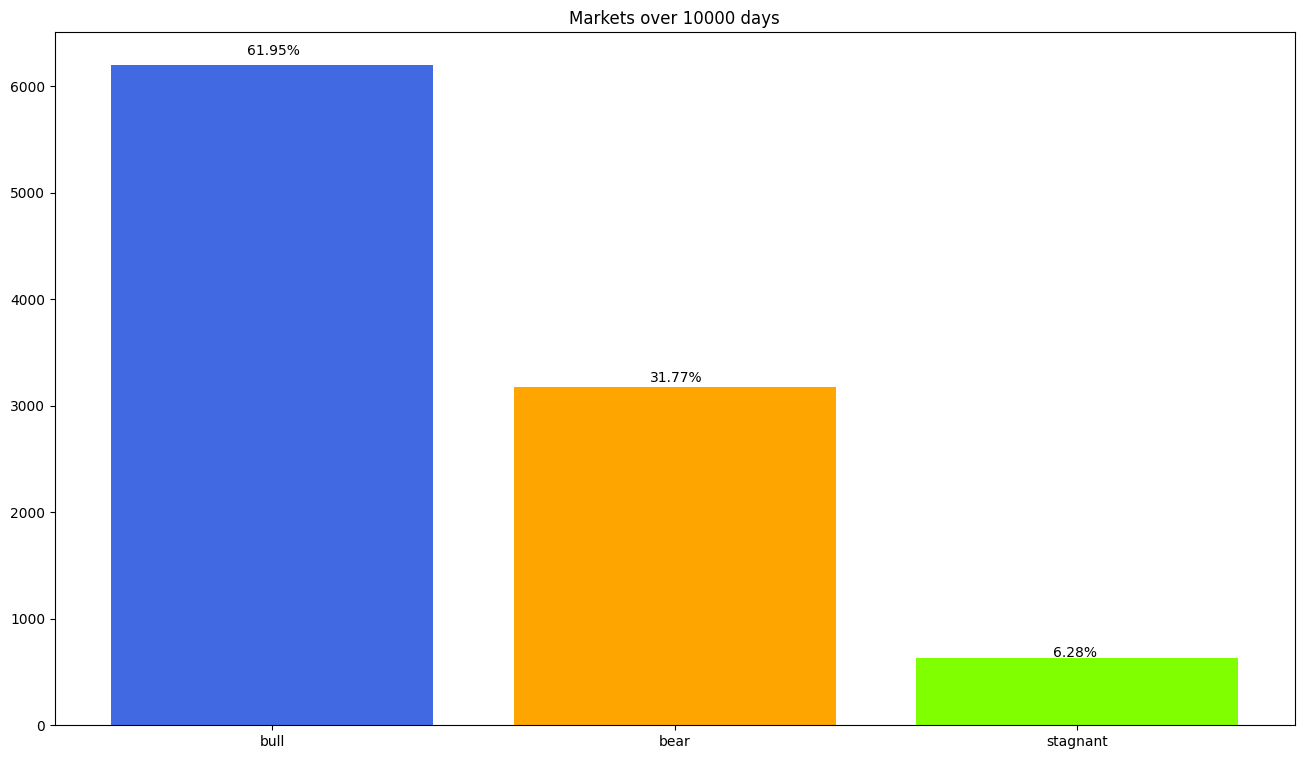

In [11]:
fig, ax = plt.subplots(figsize=(16,9))

ax.set_title("Markets over " + str(N) + " days")
ax.bar(market_list, market_counter, color=market_colors)

for i in ax.patches:
    text = str(round((i.get_height() / N) * 100, 2)) + "%"
    plt.text(i.get_x() + i.get_width() / 2 * (1 - 2 / 13), i.get_height() * (1 + 0.015), text)

plt.show()

BULL
Expected value of mu = 0.6269073499915141
68% credible region = 0.6180843677570057 to 0.642791577831468

BEAR
Expected value of mu = 0.3142120305498844
68% credible region = 0.3009740561962532 to 0.3209991709952544

STAGNANT
Expected value of mu = 0.058880619458601575
68% credible region = 0.05553802579556258 to 0.06226665325667835



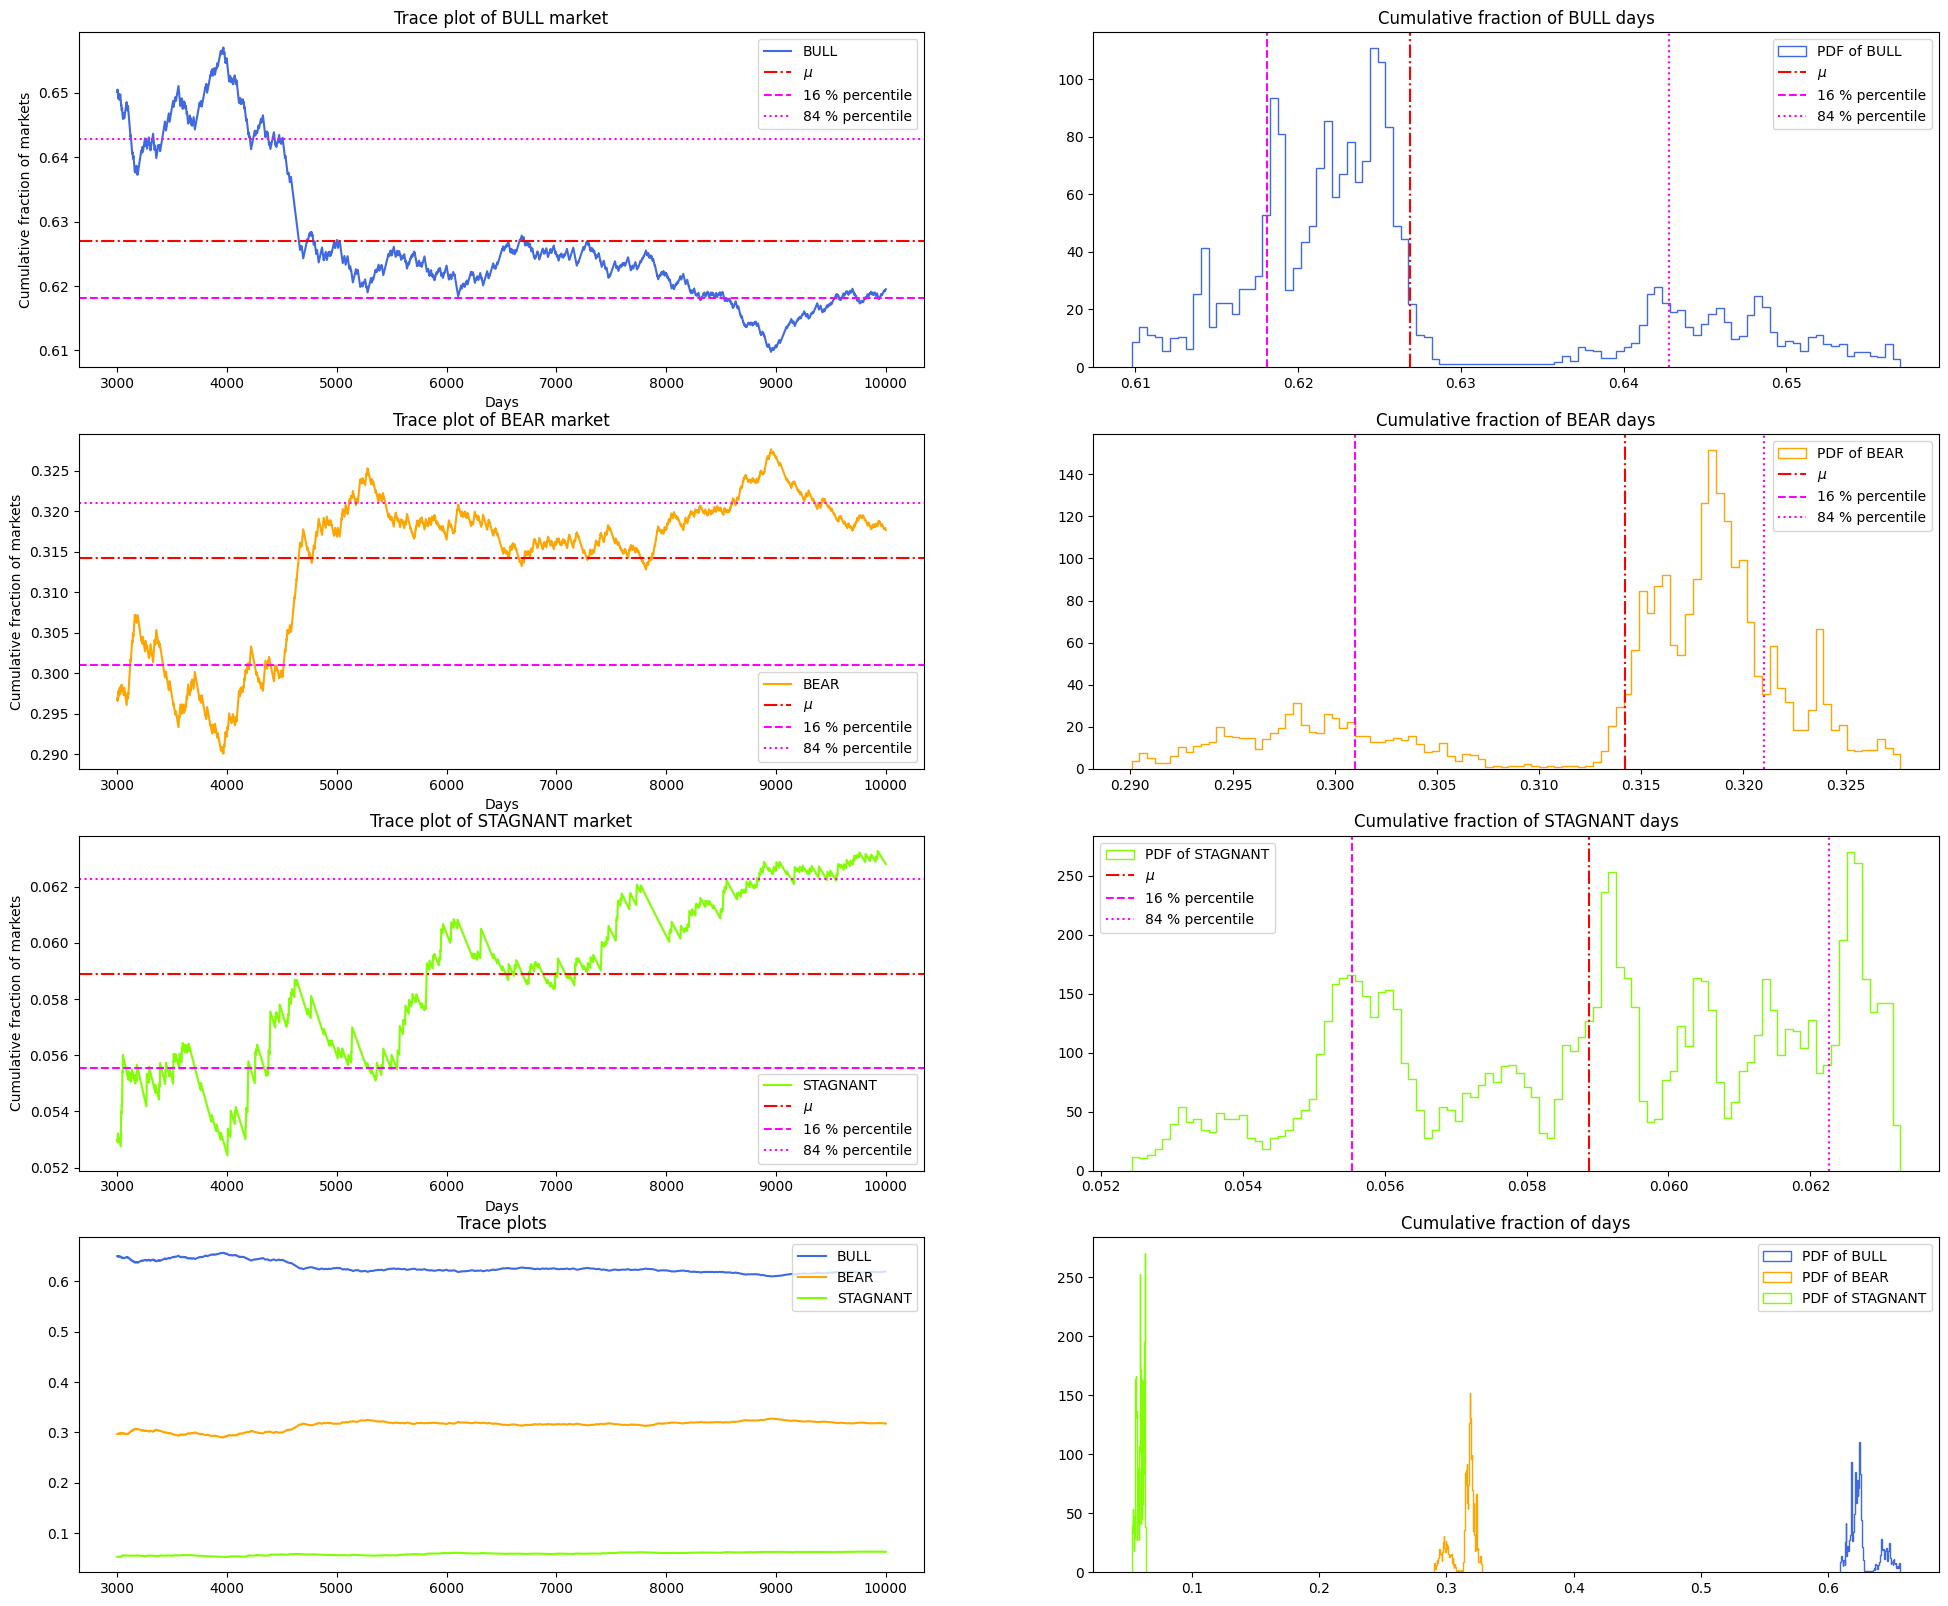

In [12]:
n_rows = len(market_indexes) + 1
n_cols = 2

# Days from 1 to N
days_grid = np.array(range(1, N + 1))

fig, ax = plt.subplots(n_rows, n_cols, figsize=(24,20))

# Index of days from which the plots start
# We want to discard initial indexes where we are dominated by the initial conditions
start_index = 3000

# estimators[weather_index][estimator]
# estimator: 0, 1, 2 (mu, lower, upper, MAP) where 'lower' and 'upper' are
# 68% equal-tailed credible region for mu, 'mu' is the mean from the PDF and
# 'MAP' is the maximum a posteriori
estimators = np.zeros((len(market_indexes), 3))

q1, q2 = 16, 84

# Parameters for estimators plots
estimators_colors = ['red', 'magenta', 'magenta']
estimators_styles = ['-.', '--', ':']
# the 'r' in front of '$\mu$' is to avoid warnings
estimators_names = [r'$\mu$', str(q1) + ' % percentile', str(q2) + ' % percentile']

for i in market_indexes:
    estimators[i][0] = np.mean(cumulative_markets[i][start_index:])
    estimators[i][1] = np.percentile(cumulative_markets[i][start_index:], q=q1)
    estimators[i][2] = np.percentile(cumulative_markets[i][start_index:], q=q2)

    # Trace plots
    ax[i][0].set_title("Trace plot of " + market_list[i].upper() + " market")
    ax[i][0].set_xlabel("Days")
    ax[i][0].set_ylabel("Cumulative fraction of markets")

    ax[i][0].plot(days_grid[start_index:],
                  cumulative_markets[i][start_index:],
                  color=market_colors[i],
                  label=market_list[i].upper())
    
    for j in range(3):
        ax[i][0].axhline(estimators[i][j],
                         color=estimators_colors[j],
                         label=estimators_names[j],
                         ls=estimators_styles[j])
    
    ax[n_rows-1][0].plot(days_grid[start_index:],
                         cumulative_markets[i][start_index:],
                         color=market_colors[i],
                         label=market_list[i].upper())
    
    ax[i][0].legend()

    # Histograms
    nbins = 100

    ax[i][1].set_title("Cumulative fraction of " + market_list[i].upper() + " days")

    ax[i][1].hist(cumulative_markets[i][start_index:],
                  nbins,
                  color=market_colors[i],
                  density=True,
                  label="PDF of "+market_list[i].upper(),
                  histtype='step')
    
    for j in range(3):
        ax[i][1].axvline(estimators[i][j],
                         color=estimators_colors[j],
                         label=estimators_names[j],
                         ls=estimators_styles[j])
    
    ax[n_rows-1][1].hist(cumulative_markets[i][start_index:],
                         nbins,
                         color=market_colors[i],
                         density=True,
                         label="PDF of "+market_list[i].upper(),
                         histtype='step')
    
    ax[i][1].legend()

    # Printing estimators
    print(market_list[i].upper())
    print("Expected value of mu = " + str(estimators[i][0]))
    print("68% credible region = " + str(estimators[i][1]) + " to " + str(estimators[i][2]) + "\n")

ax[n_rows-1][0].set_title("Trace plots")
ax[n_rows-1][1].set_title("Cumulative fraction of days")

ax[n_rows-1][0].legend()
ax[n_rows-1][1].legend()

plt.show()